In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [3]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [5]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [6]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [7]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [8]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


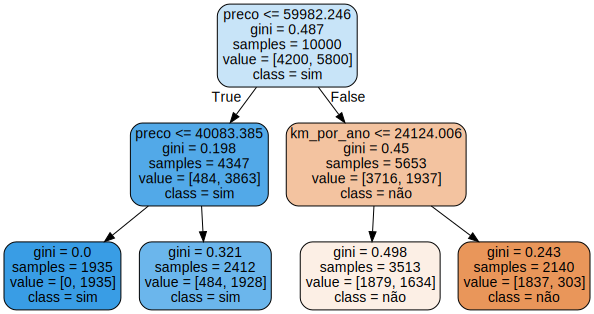

In [10]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(
    modelo, 
    out_file=None, 
    filled=True, 
    rounded=True, 
    class_names=['não', 'sim'],
    feature_names=features
)
graph = graphviz.Source(dot_data)
graph

In [11]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


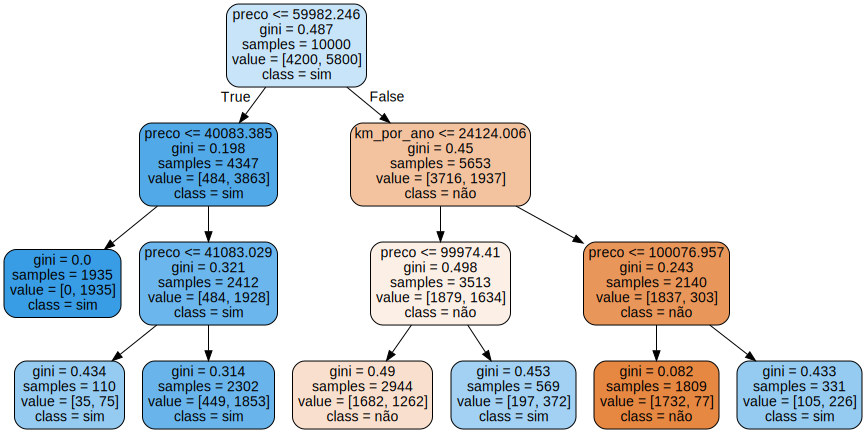

In [12]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(
    modelo, 
    out_file=None, 
    filled=True, 
    rounded=True, 
    class_names=['não', 'sim'],
    feature_names=features
)
graph = graphviz.Source(dot_data)
graph

In [13]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


# Testando parâmetros

In [39]:
def roda_arvore_de_desicao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = max_depth)
    modelo = DecisionTreeClassifier(max_depth=10)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = round(results["test_score"].mean() * 100, 2)
    test_score = round(results["train_score"].mean() * 100, 2)
    print(f'Arvore max_depth = {max_depth}, treino = {test_score}, teste = {train_score}')
    tabela = [max_depth, train_score, test_score]
    return tabela
    

resultados = [roda_arvore_de_desicao(i) for i in range(2, 25)]
resultados = pd.DataFrame(resultados, columns=['max_depth', 'train', 'test'])
resultados.head()

Arvore max_depth = 2, treino = 82.7, teste = 75.94
Arvore max_depth = 3, treino = 82.05, teste = 76.91
Arvore max_depth = 4, treino = 81.54, teste = 76.78
Arvore max_depth = 5, treino = 81.66, teste = 76.99
Arvore max_depth = 6, treino = 81.28, teste = 76.66
Arvore max_depth = 7, treino = 81.31, teste = 76.96
Arvore max_depth = 8, treino = 81.24, teste = 76.96
Arvore max_depth = 9, treino = 81.33, teste = 76.88
Arvore max_depth = 10, treino = 81.16, teste = 77.19
Arvore max_depth = 11, treino = 80.99, teste = 77.16
Arvore max_depth = 12, treino = 81.05, teste = 77.03
Arvore max_depth = 13, treino = 81.0, teste = 77.07
Arvore max_depth = 14, treino = 80.97, teste = 77.03
Arvore max_depth = 15, treino = 80.96, teste = 76.95
Arvore max_depth = 16, treino = 80.97, teste = 77.0
Arvore max_depth = 17, treino = 80.97, teste = 76.9
Arvore max_depth = 18, treino = 80.95, teste = 76.95
Arvore max_depth = 19, treino = 80.96, teste = 76.93
Arvore max_depth = 20, treino = 80.94, teste = 77.11
Arvor

,max_depth,train,test
0,2,75.94,82.70
1,3,76.91,82.05
2,4,76.78,81.54
3,5,76.99,81.66
4,6,76.66,81.28


<AxesSubplot:xlabel='max_depth', ylabel='train'>

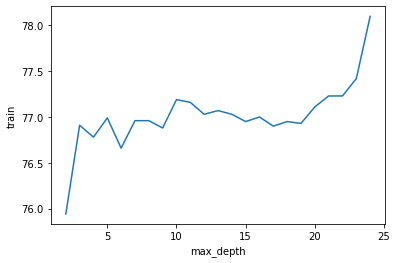

In [40]:
import seaborn as sns

sns.lineplot(data=resultados, x='max_depth', y='train')

# OVERFIT: Ficou 'perfeito' para o treino mas ruim para o teste

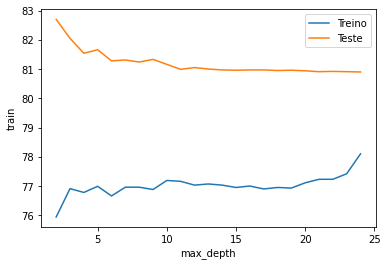

In [43]:
import matplotlib.pyplot as plt

sns.lineplot(data=resultados, x='max_depth', y='train')
sns.lineplot(data=resultados, x='max_depth', y='test')
plt.legend(['Treino', 'Teste'])

In [44]:
resultados.sort_values('test', ascending=False).head()

,max_depth,train,test
0,2,75.94,82.70
1,3,76.91,82.05
3,5,76.99,81.66
2,4,76.78,81.54
7,9,76.88,81.33
